In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor  # Assuming you want to use MLP

# Load the data
try: 
    bmw_data = pd.read_csv('./Data/bmw.csv')
except FileNotFoundError:
    print("File not found")
    exit(1)

# Assuming 'price' is the target variable (modify if needed)
y = bmw_data['price'] if 'price' in bmw_data.columns else bmw_data.iloc[:, -1]

# All columns except the target
X = bmw_data.drop(y.name, axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

categorical_cols = ['model', 'transmission', 'fuelType', 'year']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that preprocesses the data and then applies the MLP model
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("random_forest", random_forest),
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the model on test data
score = pipe.score(X_test, y_test)
print(f"\nR² score on test data: {score:.4f}")

# Make predictions
y_pred = pipe.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# If you want to use the pipeline for new data:
# predictions = pipe.predict(new_data)


Training set shape: (8624, 8)
Testing set shape: (2157, 8)

R² score on test data: 0.9366
Mean Squared Error: 8203615.2881
Root Mean Squared Error: 2864.1954
Mean Absolute Error: 1690.5401
R² Score: 0.9366


Script execution started at: 2025-05-06 18:28:44.114051

Data loaded successfully.
Initial dataset shape: (10781, 9)

--- Stage 2: Data Cleaning, Feature Engineering & Outlier Removal ---
Imputed engineSize for 33 Hybrid cars.
'car_age' feature engineered.
4 outlier row(s) removed. New dataset shape: (10777, 10)

--- Plotting Price vs. Log(Price) Distribution ---


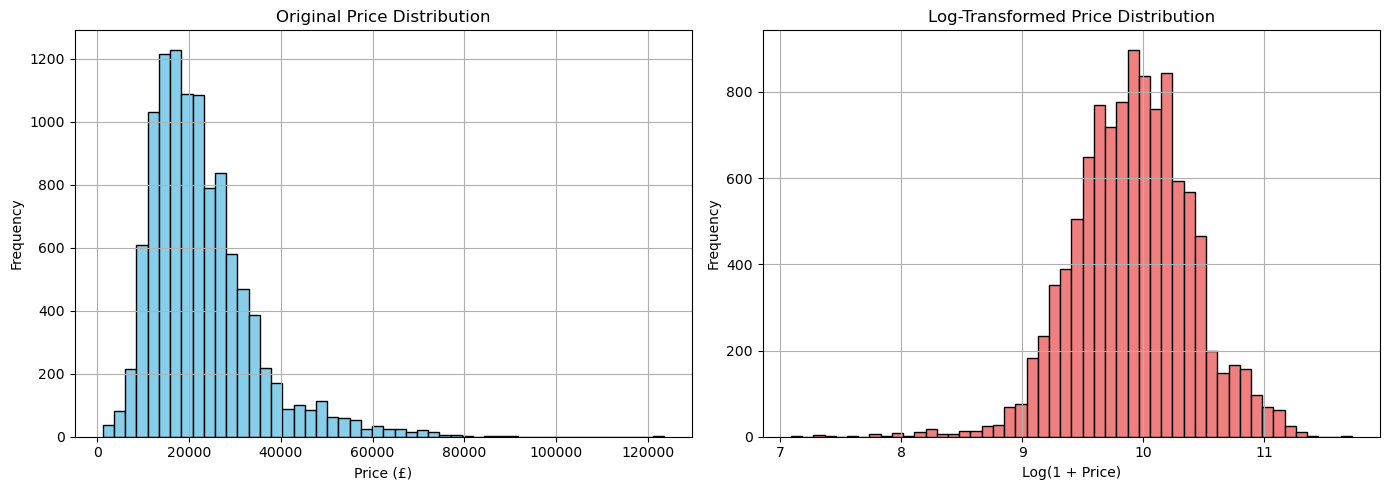


Applying Log Transform to Target ('price').

--- Final Feature Set ---
Categorical Features (3): ['model', 'transmission', 'fuelType']
Numerical Features (6): ['car_age', 'engineSize', 'mileage', 'mpg', 'tax', 'year']

--- Data Split ---
Training set shape: X=(8621, 9), y_log=(8621,)
Testing set shape:  X=(2156, 9), y_log=(2156,)

--- Defining Preprocessor ---

--- Stage 6: Defining Pipeline and Parameter Grid for GridSearchCV ---
Parameter grid defined. Total combinations for GridSearch: 432.

--- Stage 7: Hyperparameter Tuning with GridSearchCV ---
Setting up GridSearchCV with 5 folds. Total fits: 2160

Starting GridSearchCV...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
GridSearchCV finished in: 0:04:40.800878

--- Stage 8: Best Results from GridSearchCV ---
Best parameters found: {'histgradientboosting__l2_regularization': 0.7, 'histgradientboosting__learning_rate': 0.15, 'histgradientboosting__max_iter': 250, 'histgradientboosting__max_leaf_nodes': 30, 'histgr

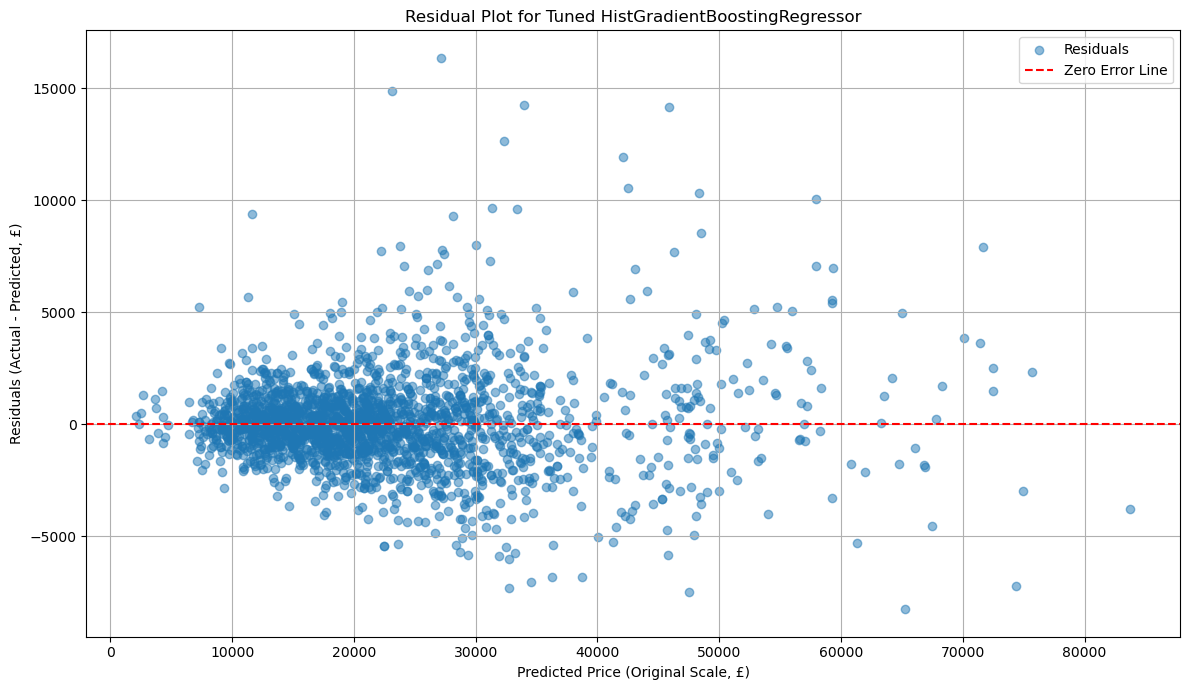


Top 15 Cars with Largest Prediction Errors (Tuned Model):
      actual  predicted  residual  abs_residual
4247   43497   27153.26  16343.74      16343.74
9931   37995   23121.58  14873.42      14873.42
5433   48155   33934.55  14220.45      14220.45
7825   60000   45852.04  14147.96      14147.96
2315   44980   32329.77  12650.23      12650.23
9119   53988   42067.98  11920.02      11920.02
6965   52991   42468.34  10522.66      10522.66
4833   58662   48357.22  10304.78      10304.78
6906   67989   57951.89  10037.11      10037.11
5526   40995   31342.93   9652.07       9652.07
5187   42995   33378.06   9616.94       9616.94
8504   20999   11626.38   9372.62       9372.62
5381   37450   28167.35   9282.65       9282.65
6749   56995   48475.84   8519.16       8519.16
3414   56990   65236.62  -8246.62       8246.62

Features of Top 10 Cars with Largest Errors (Tuned Model):
         model  year transmission  mileage fuelType  tax    mpg  engineSize  \
4247        i8  2014    Automatic 

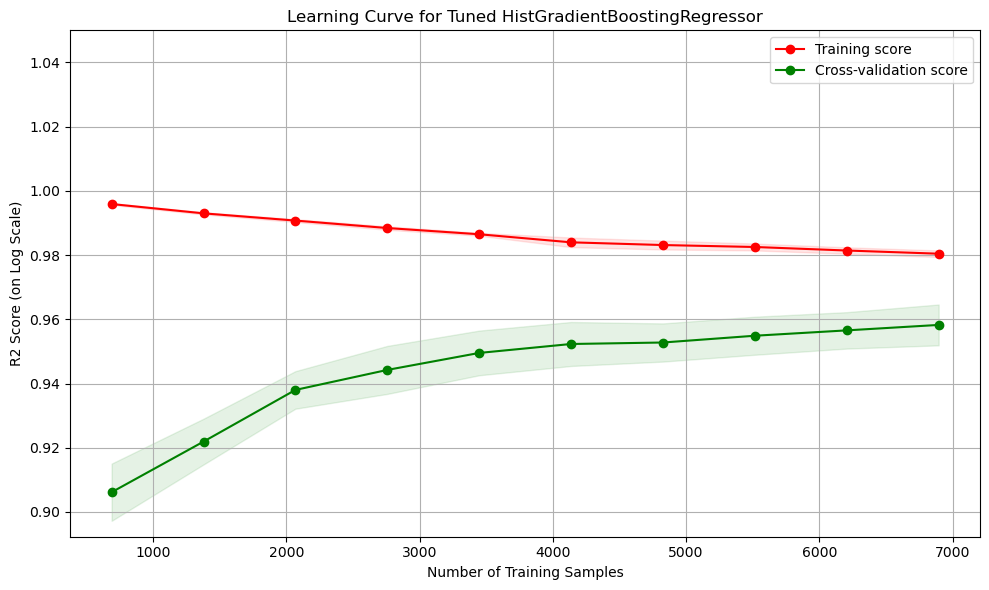

Learning curve plot generated.

--- Stage 12: Permutation Feature Importance for Tuned Model ---
Shape of X_test_transformed for Permutation Importance: (2156, 38)
Retrieved 38 feature names for importance plot.
Permutation importance calculated. Number of importances: 38
Feature name count matches importance score count for plotting.


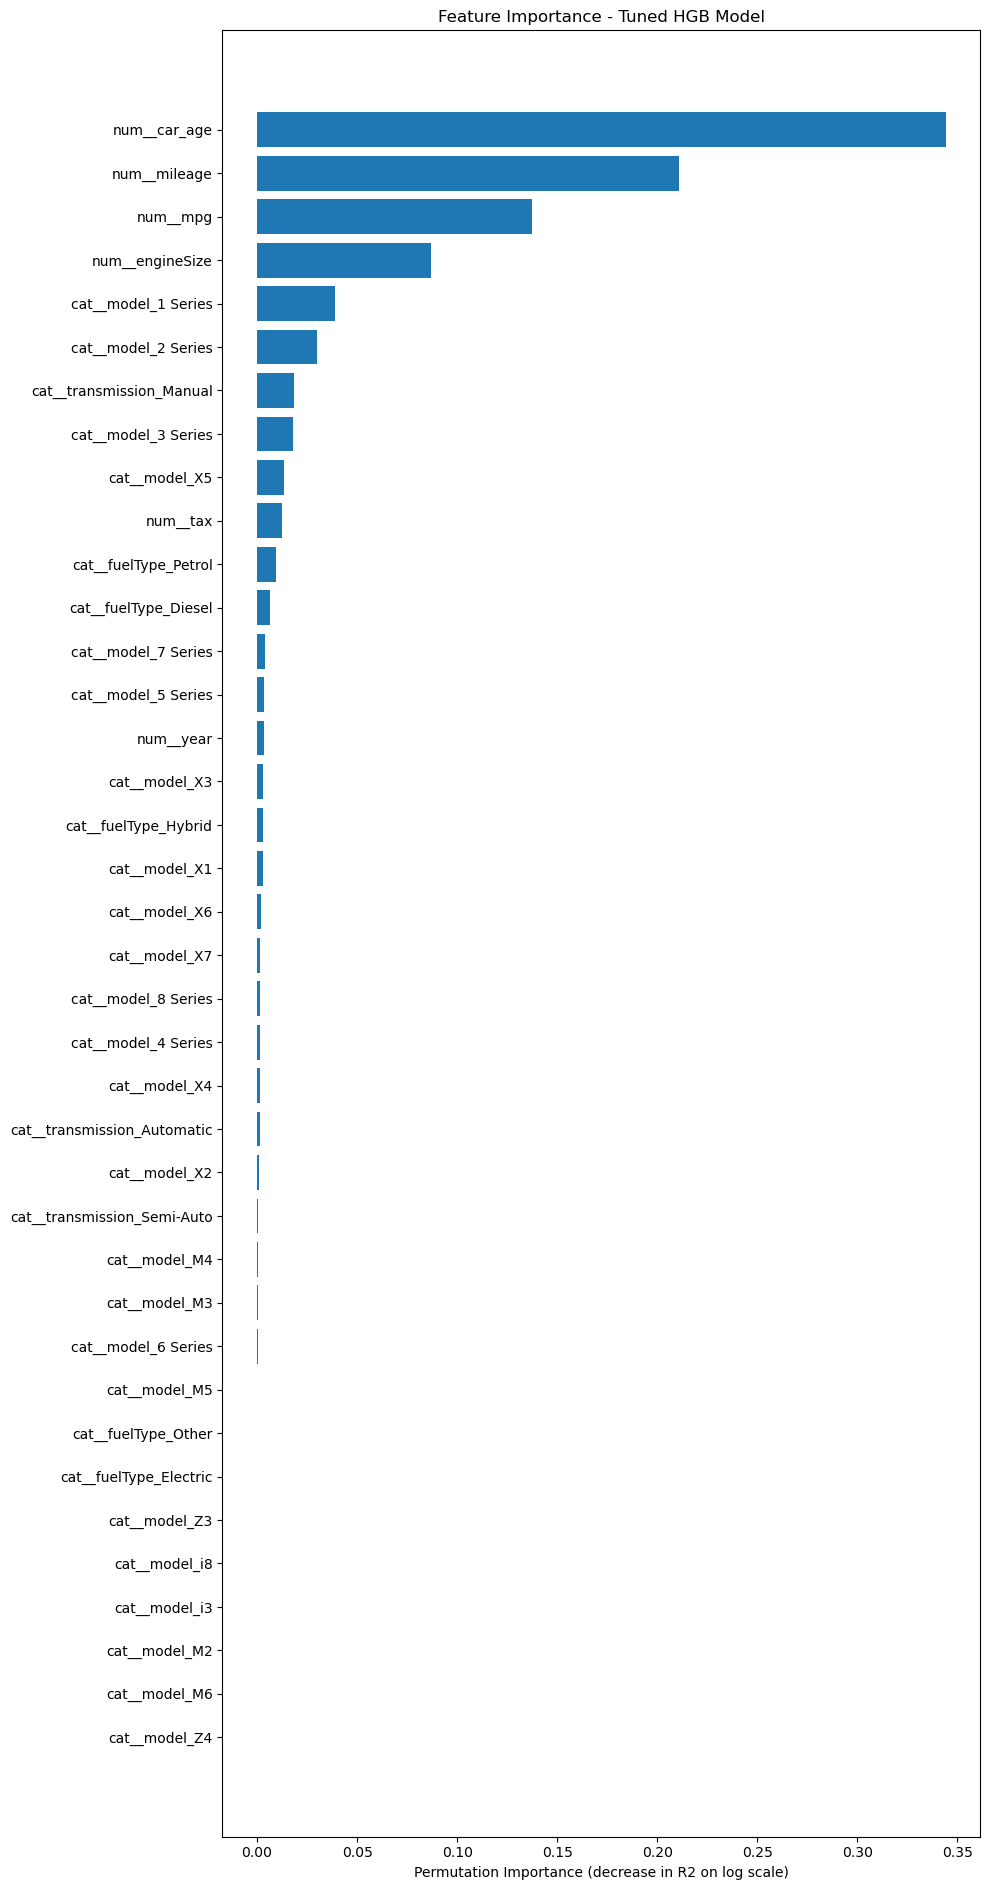


Script execution finished at: 2025-05-06 18:33:31.789037


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

print(f"Script execution started at: {datetime.now()}")

# --- 1. Load Data ---
try:
    bmw_data = pd.read_csv('./Data/bmw.csv')
    print("\nData loaded successfully.")
    print(f"Initial dataset shape: {bmw_data.shape}")
except FileNotFoundError:
    print("Error: bmw.csv not found in the ./Data/ directory.")
    exit(1)


# --- 2. Data Cleaning, Feature Engineering & Outlier Removal (Pre-Split) ---
print("\n--- Stage 2: Data Cleaning, Feature Engineering & Outlier Removal ---")

# Impute engineSize for Hybrids
is_hybrid_zero_engine = (bmw_data['fuelType'] == 'Hybrid') & (bmw_data['engineSize'] == 0.0)
if is_hybrid_zero_engine.sum() > 0:
    median_hybrid_engine_size = bmw_data.loc[(bmw_data['fuelType'] == 'Hybrid') & (bmw_data['engineSize'] > 0.0), 'engineSize'].median()
    if pd.isna(median_hybrid_engine_size): median_hybrid_engine_size = bmw_data.loc[bmw_data['engineSize'] > 0.0, 'engineSize'].median() # Fallback
    if not pd.isna(median_hybrid_engine_size):
        bmw_data.loc[is_hybrid_zero_engine, 'engineSize'] = median_hybrid_engine_size
        print(f"Imputed engineSize for {is_hybrid_zero_engine.sum()} Hybrid cars.")
    else: print("Warning: Could not find median engine size for imputation.")

# Add car_age feature
current_year = datetime.now().year
bmw_data['car_age'] = current_year - bmw_data['year']
print("'car_age' feature engineered.")

# Remove identified outliers
indices_to_remove = [6451, 5362, 2909, 7085]
existing_indices_to_remove = [idx for idx in indices_to_remove if idx in bmw_data.index]
if existing_indices_to_remove:
    bmw_data = bmw_data.drop(existing_indices_to_remove)
    print(f"{len(existing_indices_to_remove)} outlier row(s) removed. New dataset shape: {bmw_data.shape}")

# Strip model names
bmw_data['model'] = bmw_data['model'].str.strip()


# --- 3. Define Features (X) and Target (y), Apply Log Transform & Plot ---
target_col = 'price'
if target_col not in bmw_data.columns: print(f"\nError: Target column '{target_col}' not found."); exit(1)

print(f"\n--- Plotting Price vs. Log(Price) Distribution ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
bmw_data[target_col].hist(ax=axes[0], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Original Price Distribution'); axes[0].set_xlabel('Price (£)'); axes[0].set_ylabel('Frequency')
bmw_data_log_transformed_target = np.log1p(bmw_data[target_col])
bmw_data_log_transformed_target.hist(ax=axes[1], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Log-Transformed Price Distribution'); axes[1].set_xlabel('Log(1 + Price)'); axes[1].set_ylabel('Frequency')
plt.tight_layout(); plt.show()

print(f"\nApplying Log Transform to Target ('{target_col}').")
bmw_data['price_log'] = np.log1p(bmw_data[target_col]); y_log = bmw_data['price_log']
y_original = bmw_data[target_col]; X = bmw_data.drop([target_col, 'price_log'], axis=1)

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
base_numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = sorted(list(set(base_numerical_cols)))
print("\n--- Final Feature Set ---")
print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")


# --- 4. Train/Test Split ---
X_train, X_test, y_train_log, y_test_log, y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42)
print("\n--- Data Split ---")
print(f"Training set shape: X={X_train.shape}, y_log={y_train_log.shape}")
print(f"Testing set shape:  X={X_test.shape}, y_log={y_test_log.shape}")


# --- 5. Define Preprocessor ---
print("\n--- Defining Preprocessor ---")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# --- START: GRIDSEARCHCV TUNING AND FINAL EVALUATION ---

# --- 6. Define Pipeline and Grid for GridSearchCV ---
print("\n--- Stage 6: Defining Pipeline and Parameter Grid for GridSearchCV ---")
tuning_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("histgradientboosting", HistGradientBoostingRegressor(random_state=42))
])
param_grid = {
    'histgradientboosting__learning_rate': [0.1, 0.15, 0.17, 0.2],
    'histgradientboosting__max_iter': [200, 215, 250, 1000],
    'histgradientboosting__max_leaf_nodes': [25, 30, 35],
    'histgradientboosting__min_samples_leaf': [15, 17, 20],
    'histgradientboosting__l2_regularization': [0.7, 0.9, 1.0]
}
num_combinations = 1
for key in param_grid: num_combinations *= len(param_grid[key])
print(f"Parameter grid defined. Total combinations for GridSearch: {num_combinations}.")


# --- 7. Run GridSearchCV ---
print("\n--- Stage 7: Hyperparameter Tuning with GridSearchCV ---")
cv_folds_grid = 5
print(f"Setting up GridSearchCV with {cv_folds_grid} folds. Total fits: {num_combinations * cv_folds_grid}")
grid_search = GridSearchCV(tuning_pipeline, param_grid=param_grid, cv=cv_folds_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1) # Verbose set to 1
print("\nStarting GridSearchCV...")
search_start_time = datetime.now()
grid_search.fit(X_train, y_train_log)
search_end_time = datetime.now()
print(f"GridSearchCV finished in: {search_end_time - search_start_time}")


# --- 8. Retrieve and Display Best Results from Tuning ---
print(f"\n--- Stage 8: Best Results from GridSearchCV ---")
print(f"Best parameters found: {grid_search.best_params_}")
best_cv_rmse_log_grid = np.sqrt(-grid_search.best_score_)
print(f"Best CV RMSE (on log scale): {best_cv_rmse_log_grid:.6f}")
best_pipeline_grid = grid_search.best_estimator_


# --- 9. Evaluate the BEST Tuned Pipeline on the Test Set ---
print("\n--- Stage 9: Evaluating Best Tuned Pipeline on Test Set ---")
y_pred_log_tuned_grid = best_pipeline_grid.predict(X_test)
y_pred_original_tuned_grid = np.expm1(y_pred_log_tuned_grid)
y_pred_original_tuned_grid[y_pred_original_tuned_grid < 0] = 0
final_mse_tuned_grid = mean_squared_error(y_test_original, y_pred_original_tuned_grid)
final_rmse_tuned_grid = np.sqrt(final_mse_tuned_grid)
final_mae_tuned_grid = mean_absolute_error(y_test_original, y_pred_original_tuned_grid)
final_r2_tuned_grid = r2_score(y_test_original, y_pred_original_tuned_grid)
print("\n--- Tuned Model Final Test Set Performance (Original Scale) ---")
print(f"  R² Score: {final_r2_tuned_grid:.4f}")
print(f"  RMSE:     £{final_rmse_tuned_grid:.2f}")
print(f"  MAE:      £{final_mae_tuned_grid:.2f}")


# --- 10. Final Error Analysis using the GridSearch Tuned Model ---
print("\n--- Stage 10: Error Analysis (Tuned Model) ---")
residuals_original_tuned_grid = y_test_original - y_pred_original_tuned_grid
plt.figure(figsize=(12, 7))
plt.scatter(y_pred_original_tuned_grid, residuals_original_tuned_grid, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel("Predicted Price (Original Scale, £)"); plt.ylabel("Residuals (Actual - Predicted, £)")
plt.title(f"Residual Plot for Tuned HistGradientBoostingRegressor"); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()
residual_df_tuned_grid = pd.DataFrame({'actual': y_test_original, 'predicted': np.round(y_pred_original_tuned_grid, 2), 'residual': np.round(residuals_original_tuned_grid, 2)})
residual_df_tuned_grid['abs_residual'] = residual_df_tuned_grid['residual'].abs()
residual_df_tuned_grid = residual_df_tuned_grid.sort_values(by='abs_residual', ascending=False)
print("\nTop 15 Cars with Largest Prediction Errors (Tuned Model):")
print(residual_df_tuned_grid.head(15))
print("\nFeatures of Top 10 Cars with Largest Errors (Tuned Model):")
outlier_indices_tuned_grid = residual_df_tuned_grid.head(10).index
outlier_details_tuned_grid = X_test.loc[outlier_indices_tuned_grid]
print(outlier_details_tuned_grid)


# --- 11. Learning Curve Analysis ---
print("\n--- Stage 11: Learning Curve Analysis for Tuned Model ---")
lc_scoring = 'r2'
train_sizes_abs, train_scores, validation_scores = learning_curve(
    estimator=best_pipeline_grid, X=X_train, y=y_train_log,
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring=lc_scoring, n_jobs=-1, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1); train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1); validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Tuned HistGradientBoostingRegressor"); plt.xlabel("Number of Training Samples")
plt.ylabel(f"{lc_scoring.capitalize()} Score (on Log Scale)"); plt.legend(loc="best"); plt.grid(True)
plt.ylim(None, 1.05); plt.tight_layout(); plt.show()
print("Learning curve plot generated.")


# --- 12. Permutation Feature Importance ---
print("\n--- Stage 12: Permutation Feature Importance for Tuned Model ---")
fitted_preprocessor = best_pipeline_grid.named_steps['preprocessor']
fitted_model = best_pipeline_grid.named_steps['histgradientboosting']
X_test_transformed = fitted_preprocessor.transform(X_test)
print(f"Shape of X_test_transformed for Permutation Importance: {X_test_transformed.shape}")
try:
    final_feature_names = list(fitted_preprocessor.get_feature_names_out())
    if X_test_transformed.shape[1] != len(final_feature_names):
         print(f"!!! WARNING: Mismatch: Transformed cols ({X_test_transformed.shape[1]}) vs Feature names ({len(final_feature_names)})")
    print(f"Retrieved {len(final_feature_names)} feature names for importance plot.")
except Exception as e: print(f"Error getting feature names from preprocessor: {e}"); exit()

perm_importance_result = permutation_importance(fitted_model, X_test_transformed, y_test_log, scoring=lc_scoring, n_repeats=10, random_state=42, n_jobs=-1)
print(f"Permutation importance calculated. Number of importances: {len(perm_importance_result.importances_mean)}")
if len(final_feature_names) != len(perm_importance_result.importances_mean):
    print(f"!!! CRITICAL MISMATCH: Names ({len(final_feature_names)}) vs Importances ({len(perm_importance_result.importances_mean)}) !!! Plot may be incorrect.")
else: print("Feature name count matches importance score count for plotting.")

sorted_idx = perm_importance_result.importances_mean.argsort()
plt.figure(figsize=(10, max(8, len(final_feature_names) // 2)))
plotted_names = [final_feature_names[i] for i in sorted_idx]
plotted_importances = perm_importance_result.importances_mean[sorted_idx]
plt.barh(plotted_names, plotted_importances)
plt.xlabel(f"Permutation Importance (decrease in {lc_scoring.capitalize()} on log scale)")
plt.title("Feature Importance - Tuned HGB Model"); plt.tight_layout(); plt.show()


print(f"\nScript execution finished at: {datetime.now()}")